# EE 511 - Homework 01

### Submitted by: Sajjad Uddin Mahmud

### Part 1: Signal with no harmonics
<br>
<span style="color:#C3260C">
1a) Draw the following waveform:

$ \begin{cases}
    6 sin(\omega t + \pi /3) \; \; t < 0.1\\    
    10 sin(\omega t + \pi /3) \; \; t \geq 0.1
    \end{cases}
$

Given that, $f=60$ Hz, and sampling frequency is 12 samples per cycle.
<span>

In [1]:
## IMPORT PACKAGES
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
## PARAMETER INPUT
f = 60.0           # frequency in Hz
T = 1/f            # period in seconds
n = 12             # samples per cycle
dT = T/n           # delta T
A1 = 6.0           # amplitude of first signal
A2 = 10.0          # amplitude of second signal
A3 = 3.0           # amplitude of second harmonic
w = 2 * np.pi * f  # omega
StartTime = 0
EndTime = 0.2

**Plotting the input signal:**

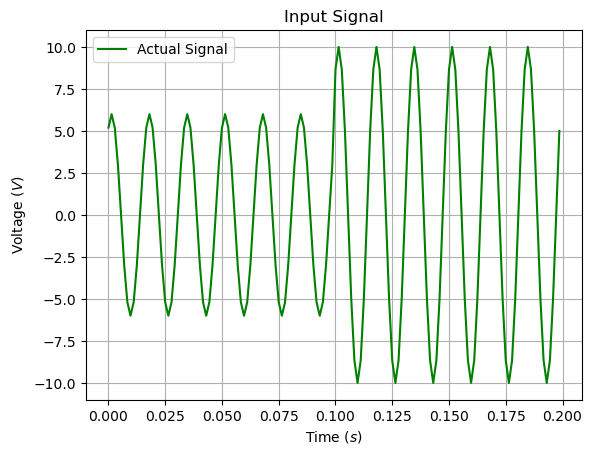

In [3]:
## PLOTTING INPUT SIGNAL
Time = np.arange(StartTime,EndTime,dT)
Voltage1 = []

for t in range(0,len(Time)):
    
    if Time[t] < 0.1:
        v = A1 * np.sin(w * Time[t] + np.pi/3) # first signal
    else:
        v = A2 * np.sin(w * Time[t] + np.pi/3) # second signal
        
    Voltage1.append(v)

plt.plot(Time,Voltage1,'green')
plt.title("Input Signal")
plt.xlabel("Time $(s)$")
plt.ylabel("Voltage $(V)$")
plt.legend(["Actual Signal"])
plt.grid()
plt.show()


<span style="color:#C3260C">
1b) Estimate the amplitude of the signal using Mann&Morrison algorithm
</span>

In Mann & Morrison algorithm, it is assumed that the signal can be represented as a pure sinusoid whose amplitude as well as frequency is constant during the period under consideration [1]. 

So for a signal $V = V_{p} sin(\omega_{0}t + \theta)$: $\\$
$V_{p} = \sqrt{(V_{p}sin\theta)^2 + (V_{p}cos\theta)^2} = \sqrt{(V_{0})^2 + (\frac{V_{+1}-V_{-1}}{2\omega_{0} \Delta t})^2}$

Here, sine component, $V_{p}sin\theta = V_{0}$ and cosine component $V_{p}cos\theta = \frac{V_{+1}-V_{-1}}{2\omega_{0} \Delta t}$

**Mann & Morrison Algorithm Function:**

In [4]:
# MANN & MORRISON ALGORITHM

def MannMorrison(StartTime,EndTime,sample,frequency,voltage):
    
    f0 = frequency # fundamental frequency
    n = sample
    
    T = 1/f0
    dT = T/n
    w0 = 2 * np.pi * f0
    time = np.arange(StartTime,EndTime,dT)
    Vp = []

    for t in range(1, len(time)-1):
        sine_component = voltage[t]
        cosine_component = (voltage[t+1] - voltage[t-1])/(2 * w0 * dT)
        vp_temp = np.sqrt(sine_component**2 + cosine_component**2)
        Vp.append(vp_temp)

    Vp.append(vp_temp)

    # PLOT
    plt.plot(time,voltage,'green')
    plt.plot(time[1:len(time)],Vp,'r-')
    plt.title("Mann&Morrison Algorithm for " + str(n) + " Samples")
    plt.xlabel("Time $(s)$")
    plt.ylabel("Voltage $(V)$")
    plt.legend(["Actual", "Estimated"])
    plt.grid()
    plt.show()   

**Applying Mann & Morrison algorithm on input signal:**

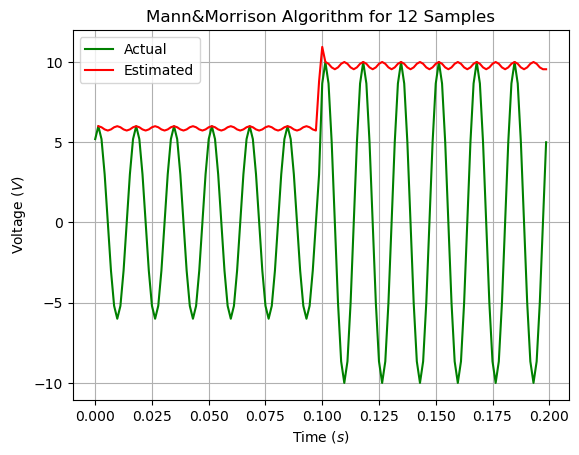

In [5]:
MannMorrison(StartTime,EndTime,n,f,Voltage1)

<span style="color:#C3260C">
1c) Estimate the amplitude of the signal using Prodar algorithm
</span>

The basic difference between Mann&Morrison and Prodar algorithm is, in Prodar algorithm, the sine component is taken from second derivative [1]. In this way, if there is a DC component in the input signal it can be handled.

So for a signal $V = V_{p} sin(\omega_{0}t + \theta)$: $\\$
$V_{p} = \sqrt{(V_{p}sin\theta)^2 + (V_{p}cos\theta)^2}$

Where, sine component, $V_{p}sin\theta = \frac{V_{+1}-2V_{0}+V_{-1}}{(\omega_{0} \Delta t)^2}$ and cosine component $V_{p}cos\theta = \frac{V_{+1}-V_{-1}}{2\omega_{0} \Delta t}$

**Prodar Algorithm Function:**

In [6]:
# PRODAR ALGORITHM

def Prodar(StartTime,EndTime,sample,frequency,voltage):
    
    f0 = frequency # fundamental frequency
    n = sample
    
    T = 1/f0
    dT = T/n
    w0 = 2 * np.pi * f0
    time = np.arange(StartTime,EndTime,dT)
    Vp = []

    for t in range(1, len(time)-1):
        sine_component = (voltage[t+1] - 2 * voltage[t] + voltage[t-1])/((w0 * dT)**2)
        cosine_component = (voltage[t+1] - voltage[t-1])/(2 * w0 * dT)
        vp_temp = np.sqrt(sine_component**2 + cosine_component**2)
        Vp.append(vp_temp)

    Vp.append(vp_temp)

    # PLOT
    plt.plot(time,voltage,'green')
    plt.plot(time[1:len(time)],Vp,'b-')
    plt.title("Prodar Algorithm for " + str(n) + " Samples")
    plt.xlabel("Time $(s)$")
    plt.ylabel("Voltage $(V)$")
    plt.legend(["Actual", "Estimated"])
    plt.grid()
    plt.show()   

**Applying Prodar algorithm on input signal:**

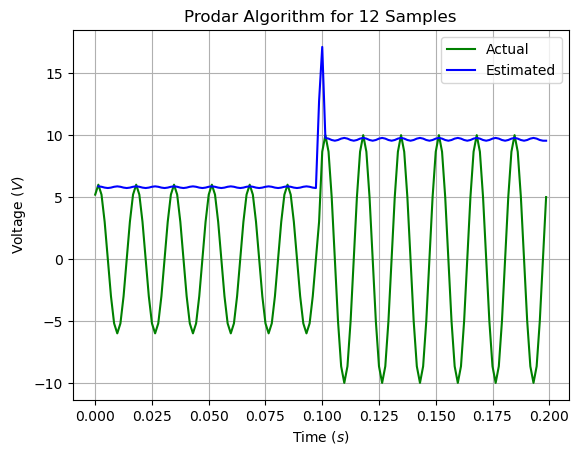

In [7]:
Prodar(StartTime,EndTime,n,f,Voltage1)

### Part 2: Signal with harmonics
<br>
<span style="color:#C3260C">
2a) Add second harmonic to the signal which means the signal becomes as follows:

$ \begin{cases}
    6 sin(\omega t + \pi /3) + 3 sin(2\omega t + \pi /3) \; \; t < 0.1\\    
    10 sin(\omega t + \pi /3) + 3 sin(2\omega t + \pi /3) \; \; t \geq 0.1
    \end{cases}
$

Given that, $f=60$ Hz, and sampling frequency is 12 samples per cycle.
<span>

**Plotting the input signal:**

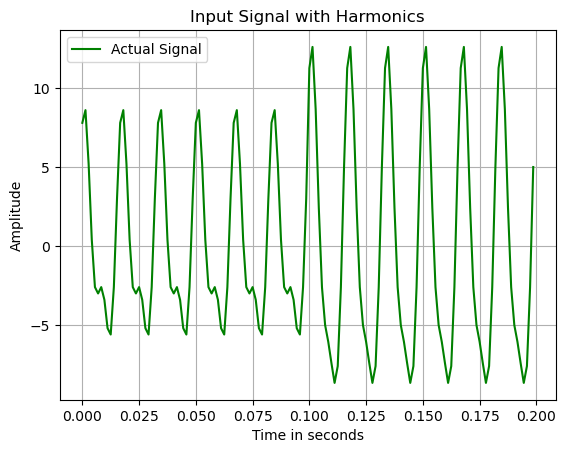

In [8]:
## PLOT
Time = np.arange(StartTime,EndTime,dT)
Voltage2 = []

for t in range(0,len(Time)):
    
    if Time[t] < 0.1:
        v = (A1 * math.sin(2 * np.pi * f * Time[t] + np.pi/3)) + 
        (A3 * math.sin(2 * 2 * np.pi * f * Time[t] + np.pi/3)) # First signal
    else:
        v = A2 * math.sin(2 * np.pi * f * Time[t] + np.pi/3) + 
        (A3 * math.sin(2 * 2 * np.pi * f * Time[t] + np.pi/3)) # Second signal
        
    Voltage2.append(v)

plt.plot(Time,Voltage2,'green')
plt.title("Input Signal with Harmonics")
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.legend(["Actual Signal"])
plt.grid()
plt.show()

<span style="color:#C3260C">
2b) Estimate the amplitude of the signal using Mann&Morrison algorithm
</span>

**Applying Mann & Morrison algorithm on input signal:**

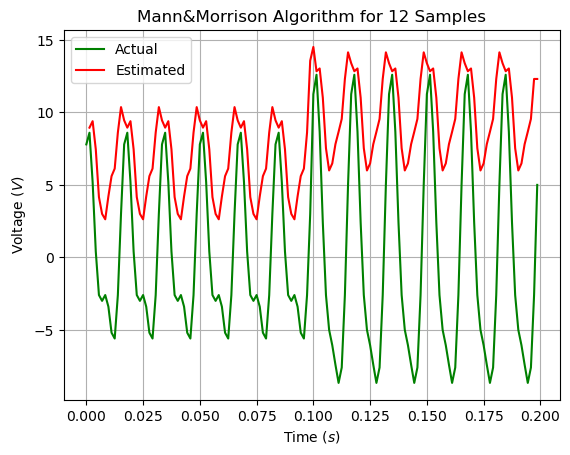

In [9]:
# MANN & MORRISON ALGORITHM
MannMorrison(StartTime,EndTime,n,f,Voltage2)

<span style="color:#C3260C">
2c) Estimate the amplitude of the signal using Prodar algorithm
</span>

**Applying Prodar algorithm on input signal:**

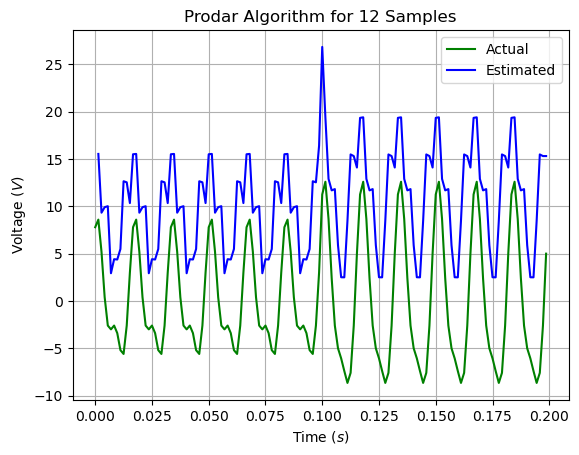

In [10]:
Prodar(StartTime,EndTime,n,f,Voltage2)

#### References

[1] S. R. Bhide, *Digital Power System Protection*, Delhi, 2014.